In [181]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [130]:
price = pd.read_csv("airbnb_price.csv")
room = pd.read_excel("airbnb_room_type.xlsx")
review = pd.read_csv("airbnb_last_review.tsv", delimiter='\t')

## Basic Analysis

# Q No. 2: No. of Pvt Rooms Listings

In [131]:
no_pvt_rooms = len(room[room["room_type"].str.upper() == 'PRIVATE ROOM'])
no_pvt_rooms

11356

# Q No. 3: Average Listing Price

In [132]:
price["price"] = price["price"].str.replace(" dollars",".0")

In [133]:
price["price"] = price["price"].astype(float)

In [134]:
avg_price = price["price"].mean().round(2)
avg_price

141.78

# Q No. 1: Date of Last Review

In [135]:
review["last_review"] = pd.to_datetime(review["last_review"])
last_review = review["last_review"].max()
print(last_review)

2019-07-09 00:00:00


# Q No. 1: Date of First Review

In [136]:
first_review = review["last_review"].min()
print(first_review)

2019-01-01 00:00:00


In [137]:
arrays = np.array([[first_review, last_review, no_pvt_rooms, avg_price]])

In [138]:
df = pd.DataFrame(arrays, columns = ['first_review', 'last_review', 'no_pvt_rooms', 'avg_price'])

# Q No. 4: DataFrame review_dates

In [139]:
df

,first_review,last_review,no_pvt_rooms,avg_price
0,2019-01-01,2019-07-09,11356,141.78


## Intermediate Analysis

# Q No. 5: Top 5 Most Expensive Neighborhoods

In [140]:
top = price.groupby(["nbhood_full"])["price"].mean().sort_values(ascending=False).head()

In [141]:
top =top.reset_index()

In [142]:
price.groupby(["nbhood_full"])["price"].count().sort_values(ascending=False)

nbhood_full
Brooklyn, Bedford-Stuyvesant                 2209
Brooklyn, Williamsburg                       1853
Manhattan, Harlem                            1435
Brooklyn, Bushwick                           1202
Manhattan, Hell's Kitchen                    1119
                                             ... 
Bronx, Co-op City                               1
Staten Island, Lighthouse Hill                  1
Staten Island, Howland Hook                     1
Staten Island, Bay Terrace, Staten Island       1
Staten Island, Willowbrook                      1
Name: price, Length: 217, dtype: int64

In [143]:
price[price["nbhood_full"] == "Manhattan, NoHo"].count()

listing_id     41
price          41
nbhood_full    41
dtype: int64

In [144]:
listings = []
for i in top["nbhood_full"].unique():
    info = price[price["nbhood_full"] == f"{i}"].count()
    listings.append(info.price)

In [145]:
listings

[2, 61, 36, 41, 191]

In [146]:
top["listings"] = listings

In [147]:
top

,nbhood_full,price,listings
0,"Brooklyn, Sea Gate",805.000000,2
1,"Manhattan, Tribeca",396.704918,61
2,"Manhattan, Flatiron District",342.055556,36
3,"Manhattan, NoHo",335.024390,41
4,"Manhattan, SoHo",299.162304,191


In [149]:
top.rename(columns={
    'nbhood_full': 'neighborhood',
    'price': 'average_price',
    'listings': 'number_of_listings'
}, inplace=True)
top

,neighborhood,average_price,number_of_listings
0,"Brooklyn, Sea Gate",805.000000,2
1,"Manhattan, Tribeca",396.704918,61
2,"Manhattan, Flatiron District",342.055556,36
3,"Manhattan, NoHo",335.024390,41
4,"Manhattan, SoHo",299.162304,191


# DataFrame of Q 5:

In [22]:
top

,neighborhood,average_price,number_of_listings
0,"Brooklyn, Sea Gate",805.000000,2
1,"Manhattan, Tribeca",396.704918,61
2,"Manhattan, Flatiron District",342.055556,36
3,"Manhattan, NoHo",335.024390,41
4,"Manhattan, SoHo",299.162304,191


## Q No. 6: Word Analysis

## Advanced Analysis

In [43]:
price_room = pd.merge(room,price,how="left")

In [44]:
private_room_avg = price_room[price_room["room_type"].str.lower() == 'private room']["price"].mean()
private_room_avg

81.63816484677703

In [45]:
shared_room_avg = price_room[price_room["room_type"].str.lower() == 'shared room']["price"].mean()
shared_room_avg

53.465076660988075

In [46]:
apt_avg = price_room[price_room["room_type"].str.lower() == 'entire home/apt']["price"].mean()
apt_avg

197.16666666666666

## Q No.7: Bar Chart of Averages

In [47]:
import matplotlib.pyplot as plt

In [48]:
averages = [private_room_avg,shared_room_avg,apt_avg]
names = ['private_room_avg','shared_room_avg','apt_avg']

Text(0.5, 0, 'Names')

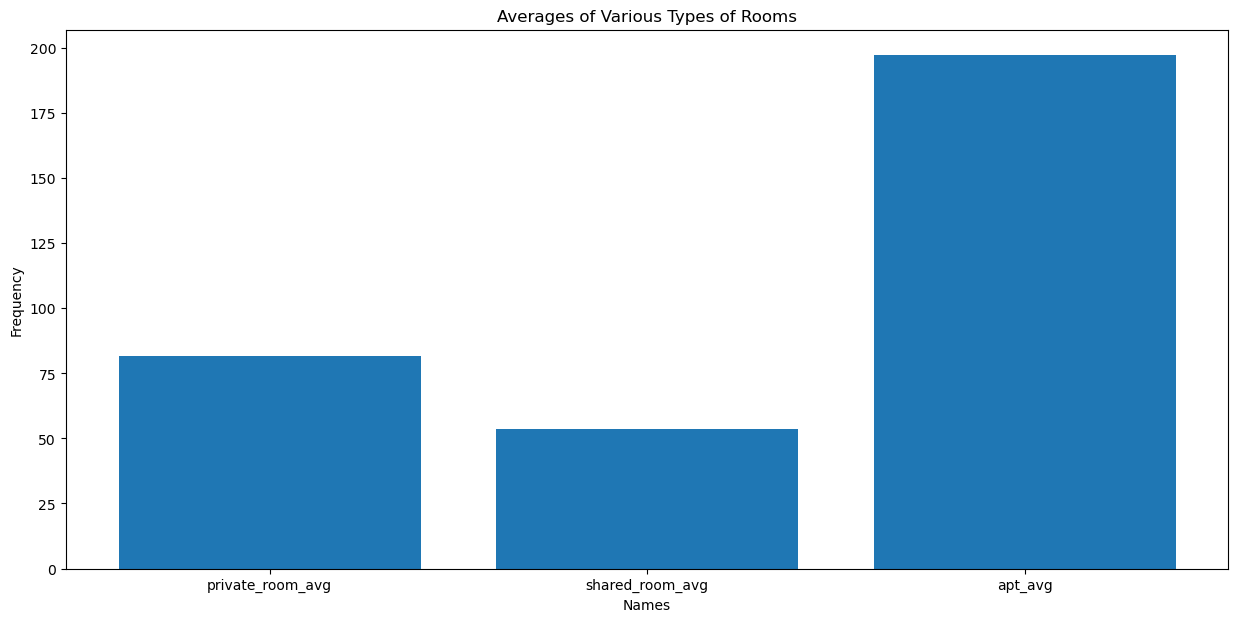

In [49]:
fig, ax = plt.subplots(figsize=(15,7))
ax.bar(names,averages)
ax.set_title("Averages of Various Types of Rooms")
ax.set_ylabel('Frequency')
ax.set_xlabel('Names')


## Q No. 8: Trends Over Time and Line Graph

In [50]:
review["last_review"] = pd.to_datetime(review["last_review"])

In [51]:
review_trend = review.groupby(["last_review"])["listing_id"].count()

In [52]:
review_trend = review_trend.reset_index()

In [53]:
review_trend = review_trend.rename(columns={
    "last_review": "date",
    "listing_id": "no_of_reviews"
})

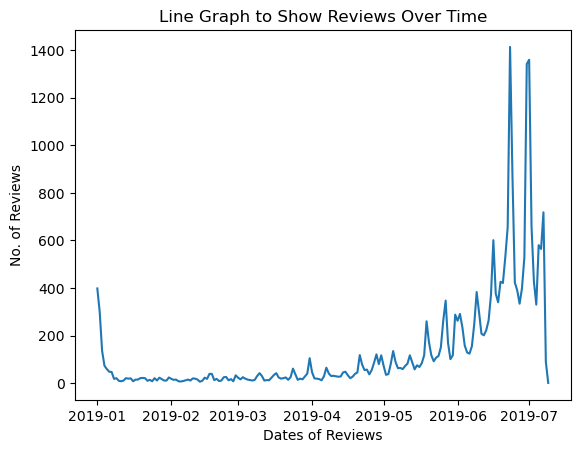

In [54]:
plt.xlabel("Dates of Reviews")
plt.ylabel("No. of Reviews")
plt.title("Line Graph to Show Reviews Over Time")
plt.plot(review_trend["date"], review_trend["no_of_reviews"])

## Q No. 9: Scatter Plot by Matplotlib
o	Create a scatter plot with a regression line showing the relationship between price and the length of the description.

	Use matplotlib.axes.Axes.annotate to highlight outliers in the graph. (Note: Students should explore this function independently.)


In [55]:
prices = price_room["price"]

In [56]:
word_length = price_room["description"].str.len()

Text(3000, 80, 'Outliers')

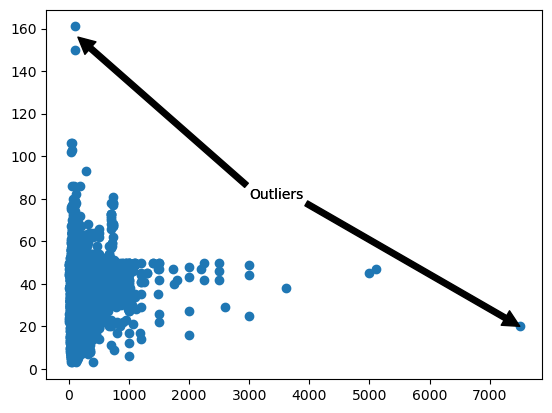

In [57]:
plt.scatter(prices,word_length)
plt.annotate('Outliers', xy=(7500, 20), xytext=(3000, 80),arrowprops=dict(facecolor='black', shrink=(1)))
plt.annotate('Outliers', xy=(150, 156), xytext=(3000, 80),arrowprops=dict(facecolor='black', shrink=(1)))

## Q No. 10: Strip Plot
o	Generate a strip plot for prices grouped by room_type using the hue parameter to distinguish neighborhoods.

	Students should explore the seaborn.stripplot function.


In [121]:
strip_data = price_room.copy()
strip_data.drop(["listing_id", "description", "nbhood_full"], inplace=True, axis=1)
strip_data = strip_data.sort_values(by="room_type")

<Axes: xlabel='price'>

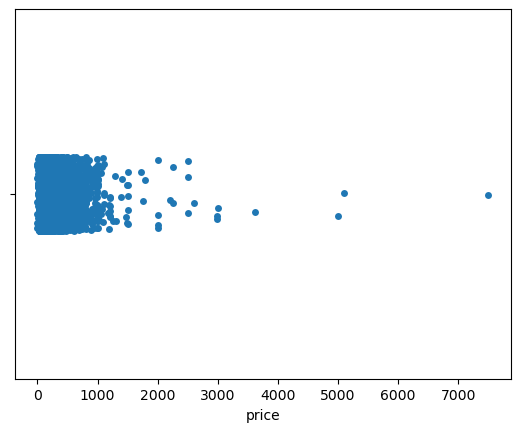

In [122]:
sns.stripplot(x=strip_data["price"], data = strip_data)

## Q No. 11:  Bar Chart Showing listings of Each Room Type
Create a bar chart showing the count of listings for each room type.

	Add proper labels, titles, and a legend.


In [68]:
apt = len(price_room[price_room["room_type"].str.lower() == "entire home/apt"])
shared = len(price_room[price_room["room_type"].str.lower() == "shared room"])
private = len(price_room[price_room["room_type"].str.lower() == "private room"])
types = ["Appartment", "Shared", "Private"]
values = [apt,shared,private]

Text(0.5, 0, 'Types')

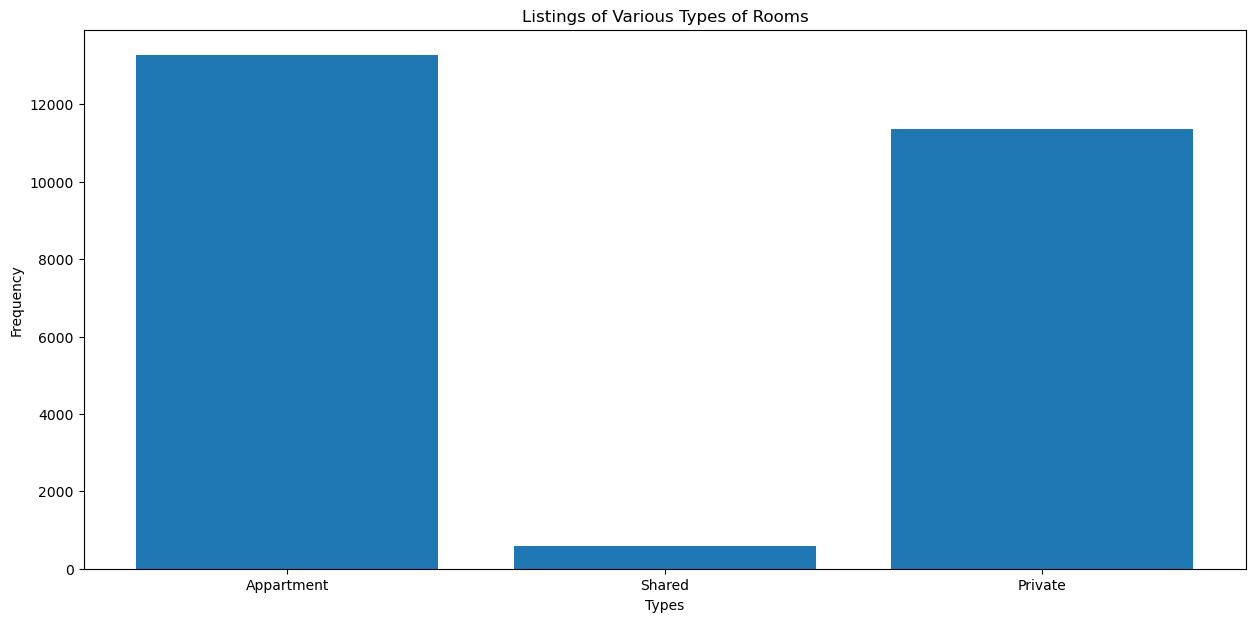

In [69]:
fig, ax = plt.subplots(figsize=(15,7))
ax.bar(types,values)
ax.set_title("Listings of Various Types of Rooms")
ax.set_ylabel('Frequency')
ax.set_xlabel('Types')


## Q No. 12: Heatmap
o	Generate a heatmap to show the correlation (if any) between listing price and the frequency of reviews.

	Use the sns.heatmap function.


In [102]:
price_review = pd.merge(price,review,how="left")
price_review.reset_index()
rev_price = price_review.groupby(["price"])["last_review"].count()


In [103]:
rev_price = rev_price.reset_index()

In [111]:
rev_price = rev_price.rename(columns={
    "price": "listing_price",
    "last_review": "frequency"
})
correlation = rev_price.corr()

<Axes: >

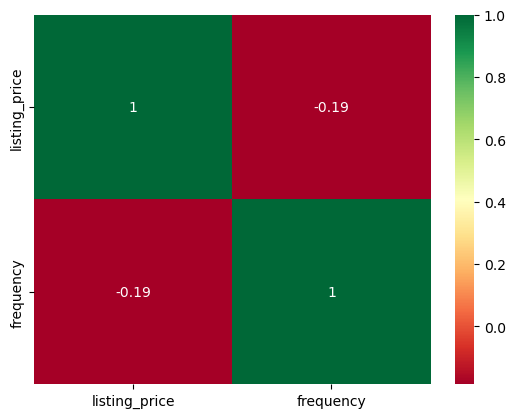

In [112]:
sns.heatmap(correlation,cmap="RdYlGn", annot=True)

## Q No. 13: Pie Chart

In [77]:
total_rooms = apt + shared + private
por_apt = (apt/total_rooms) * 100
por_private = (private/total_rooms) * 100
por_shared = (shared/total_rooms) * 100

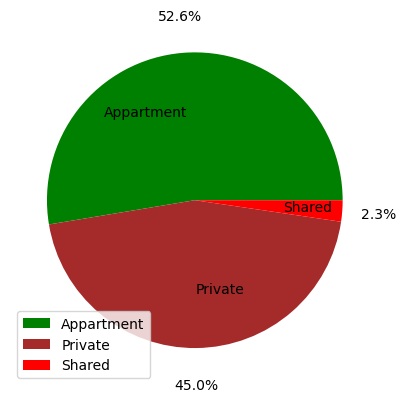

In [78]:
y = [por_apt, por_private, por_shared]
labels = ["Appartment", "Private", "Shared"]
colors = ["green", "brown", "red"]
plt.pie(y, labels = labels,colors=colors,autopct='%1.1f%%',pctdistance=1.25, labeldistance=.6)

plt.legend()
plt.show() 

## Q No. 14: Histogram

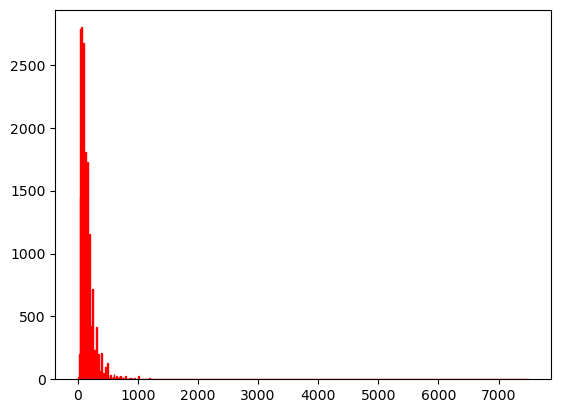

In [79]:
import matplotlib.pyplot as plt 
  
num = price["price"]
  
plt.hist(num, edgecolor="red", bins=504) 
plt.show() 

## Q No. 15: Violin Plot of Top 5 Neighborhoods
o	Create a violin plot to compare price distributions across neighborhoods.

In [182]:
top1 = np.array(price_room[price_room["nbhood_full"] == "Brooklyn, Sea Gate"]["price"])
top2 = np.array(price_room[price_room["nbhood_full"] == "Manhattan, Tribeca"]["price"])
top3 = np.array(price_room[price_room["nbhood_full"] == "Manhattan, Flatiron District"]["price"])
top4 = np.array(price_room[price_room["nbhood_full"] == "Manhattan, NoHo"]["price"])
top5 = np.array(price_room[price_room["nbhood_full"] == "Manhattan, SoHo"]["price"])
y = [top1,top2,top3,top4,top5]

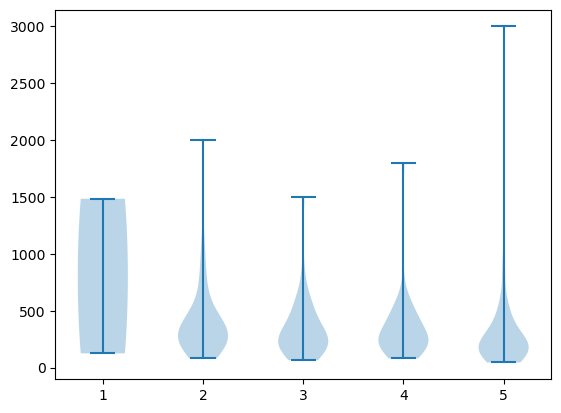

In [183]:
plt.violinplot(y)
plt.show()